<a href="https://colab.research.google.com/github/lateshapmiller/CSC302_LM/blob/main/Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

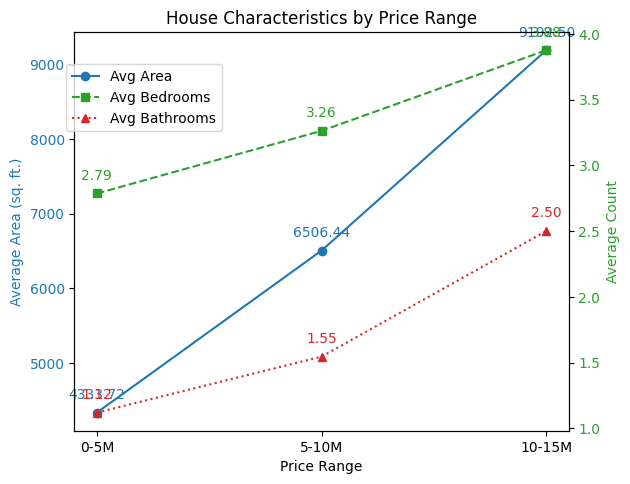

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame named 'housing_data'
# Replace 'your_data.csv' with the actual path to your data file
housing_data = pd.read_csv('/content/Housing.csv')

# Create price ranges
bins = [0, 5000000, 10000000, 15000000]
labels = ['0-5M', '5-10M', '10-15M']
housing_data['price_range'] = pd.cut(housing_data['price'], bins=bins, labels=labels)

# Group by price range and calculate mean values
price_range_stats = housing_data.groupby('price_range').agg(
    avg_area=('area', 'mean'),
    avg_bedrooms=('bedrooms', 'mean'),
    avg_bathrooms=('bathrooms', 'mean')
).reset_index()

# Plotting the data
fig, ax1 = plt.subplots()

# Plotting the average area
ax1.set_xlabel('Price Range')
ax1.set_ylabel('Average Area (sq. ft.)', color='tab:blue')
ax1.plot(price_range_stats['price_range'], price_range_stats['avg_area'], marker='o', color='tab:blue', label='Avg Area')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Add a second y-axis for bedrooms and bathrooms
ax2 = ax1.twinx()
ax2.set_ylabel('Average Count', color='tab:green')
ax2.plot(price_range_stats['price_range'], price_range_stats['avg_bedrooms'], marker='s', color='tab:green', linestyle='--', label='Avg Bedrooms')
ax2.plot(price_range_stats['price_range'], price_range_stats['avg_bathrooms'], marker='^', color='tab:red', linestyle=':', label='Avg Bathrooms')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Annotate each point with its value
for i, row in price_range_stats.iterrows():
    ax1.annotate(f'{row["avg_area"]:.2f}', (row['price_range'], row['avg_area']), textcoords="offset points", xytext=(0,10), ha='center', color='tab:blue')
    ax2.annotate(f'{row["avg_bedrooms"]:.2f}', (row['price_range'], row['avg_bedrooms']), textcoords="offset points", xytext=(0,10), ha='center', color='tab:green')
    ax2.annotate(f'{row["avg_bathrooms"]:.2f}', (row['price_range'], row['avg_bathrooms']), textcoords="offset points", xytext=(0,10), ha='center', color='tab:red')

fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.title('House Characteristics by Price Range')
plt.show()